In [1]:
%matplotlib inline

In [2]:
#import Library
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from scipy import stats

In [3]:
# Get Data
# return Vector 分別為[初速,角度,最大垂直距離,最大水平距離]
def Parabola(V0,theta):
    g = 9.8
    Vx = V0 * math.cos( theta / 180 * math.pi ) # Vx 水平方向速度
    Vy = V0 * math.sin( theta / 180 * math.pi ) # Vy 垂直方向速度
    t = 2 * Vy / g # 時間
    H = 0.5 * g * t**2 # H 最高位置
    R = Vx * t # R 水平距離
    Vector = [V0,theta,H,R]
    return Vector

# 總資料集為Dataset，利用迴圈輸入10000組資料
# 初速為1到100隨機取數，角度為1到89隨機取數

Dataset = np.zeros((10000,4))
for i in range(0,10000,1):
    Dataset[i,:] = Parabola(random.randint(0,100),random.randint(1,89))

np.save('Dataset.npy',Dataset)
Dataset = np.load('Dataset.npy')
np.savetxt('Dataset.txt',Dataset)

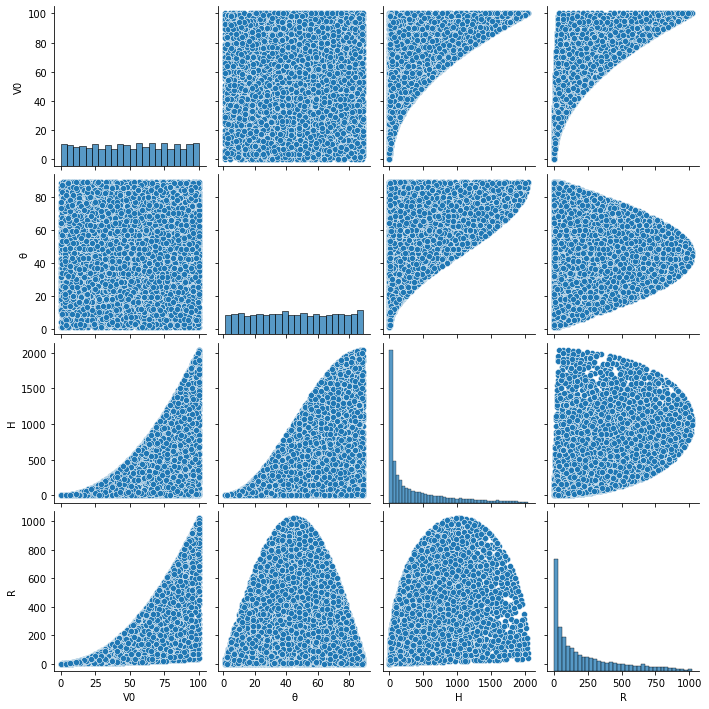

In [4]:
# Clean, Prepare & Manipulate Data
# 第ㄧ欄與第二欄為輸入層，第三欄與第四欄為輸出層
# 將10000筆分成8000筆訓練集與2000筆測試集
X_train = Dataset[:8000,:2]
Y_train = Dataset[:8000,2:]
X_test  = Dataset[8000:,:2]
Y_test  = Dataset[8000:,2:]
Train = Dataset[:8000,:]
Test = Dataset[8000:,:]

Dataset_df = pd.DataFrame(Dataset,columns = ['V0','θ','H','R'])
sns.pairplot(Dataset_df)

In [5]:
# Train Model
# Model共有輸入層、Hidden layer 兩層個各10個神經元，及輸出層

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 10 , activation = tf.nn.relu , input_dim = 2) ,
        tf.keras.layers.Dense(units = 10 , activation = tf.nn.relu),
        tf.keras.layers.Dense(units = 10 , activation = tf.nn.relu),
        tf.keras.layers.Dense(units = 10 , activation = tf.nn.relu),
        tf.keras.layers.Dense(units = 10 , activation = tf.nn.relu),
        tf.keras.layers.Dense(units = 2)
])

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['accuracy','mae','mse'])
model.summary()
history = model.fit(X_train , Y_train , epochs = 500 , batch_size = 500 , validation_split = 0.2 , verbose = 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 492
Trainable params: 492
Non-trainable params: 0
__________________________________________________________

In [6]:
score = model.evaluate(X_test , Y_test , batch_size = 500 , verbose = 0)
print('score:',score)

score: [265.67504501342773, 0.9305, 10.895918, 265.67505]


In [7]:
Y_predict = model.predict(X_test)

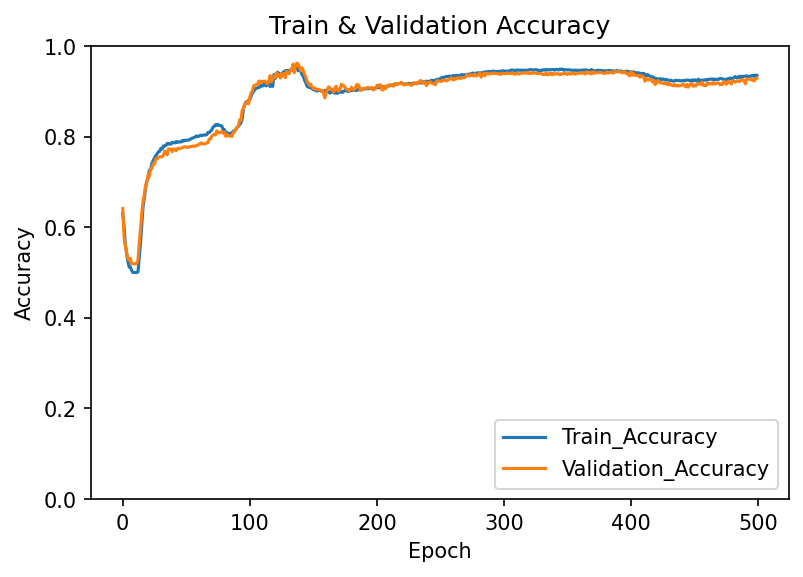

In [8]:
plt.figure(dpi = 150)
plt.title('Train & Validation Accuracy')
plt.plot(history.history['accuracy'],label = 'Train_Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend(loc = 'lower right')
plt.savefig('Accuracy.png', dpi = 150)

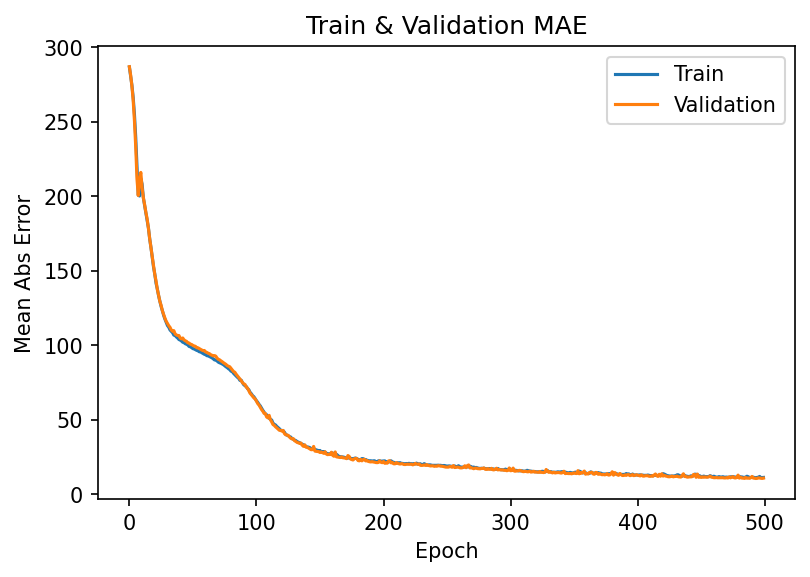

In [9]:
plt.figure(dpi = 150)
plt.title('Train & Validation MAE')
plt.plot(history.history['mae'],label = 'Train')
plt.plot(history.history['val_mae'],label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.legend()
plt.savefig('MAE.png', dpi = 150)

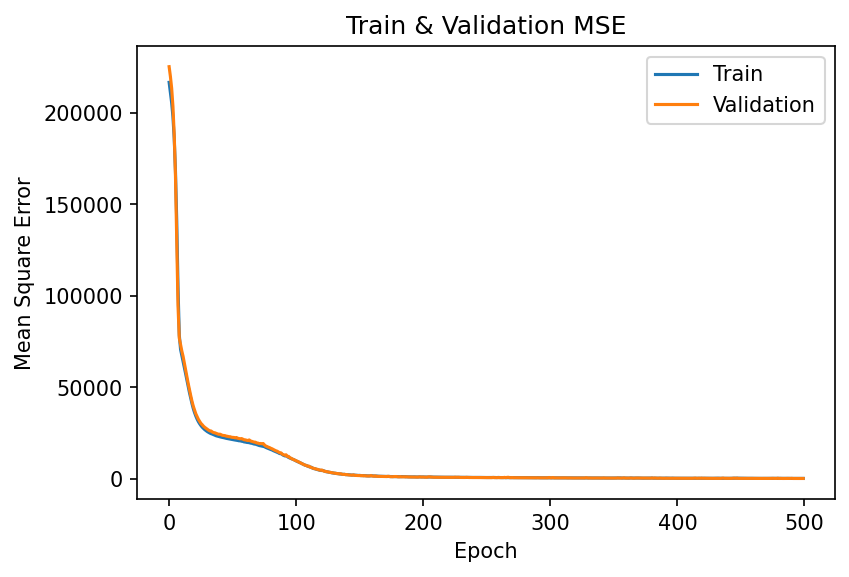

In [10]:
plt.figure(dpi = 150)
plt.title('Train & Validation MSE')
plt.plot(history.history['mse'],label = 'Train')
plt.plot(history.history['val_mse'],label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.legend()
plt.savefig('MSE', dpi = 150)

R_Pearson =  0.9994375159892003


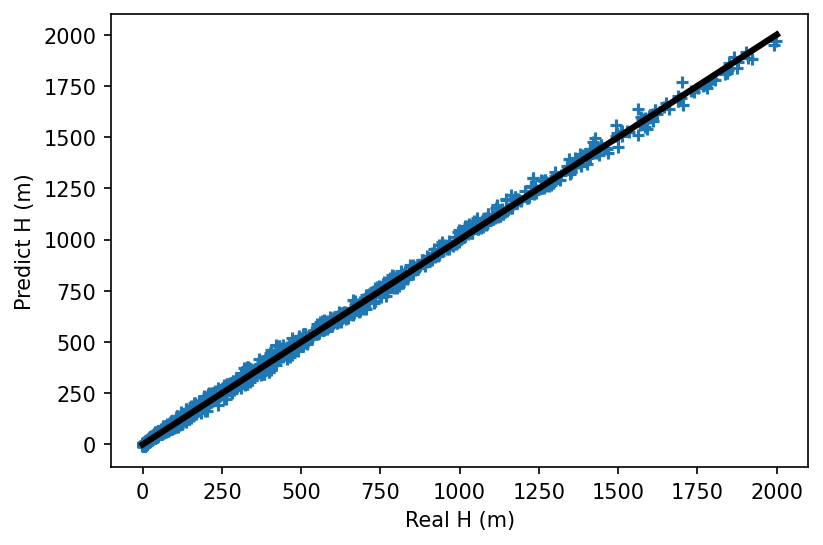

In [11]:
Y_test_reshape = np.reshape(Y_test[:,0],(2000,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(2000,))

plt.figure(dpi = 150)
plt.scatter(Y_test[:,0],Y_predict[:,0],marker = '+')
plt.plot([0,2000],[0,2000],'black',linewidth = 3)
plt.xlabel('Real H (m)')
plt.ylabel('Predict H (m)')
plt.savefig('H.png', dpi = 150)

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

R_Pearson =  0.9974596816695203


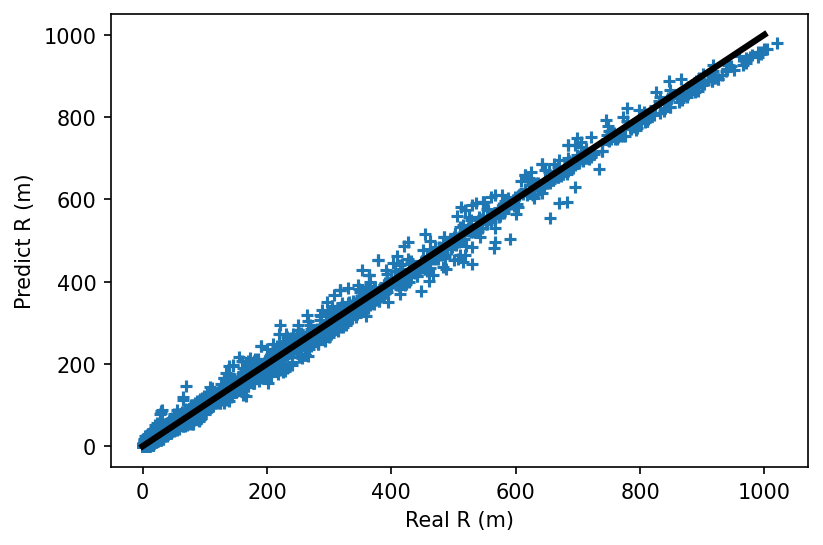

In [12]:
Y_test_reshape = np.reshape(Y_test[:,1],(2000,))
Y_predict_reshape = np.reshape(Y_predict[:,1],(2000,))

plt.figure(dpi = 150)
plt.scatter(Y_test[:,1],Y_predict[:,1],marker = '+')
plt.plot([0,1000],[0,1000],'black',linewidth = 3)
plt.xlabel('Real R (m)')
plt.ylabel('Predict R (m)')
plt.savefig('R.png', dpi = 150)

R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

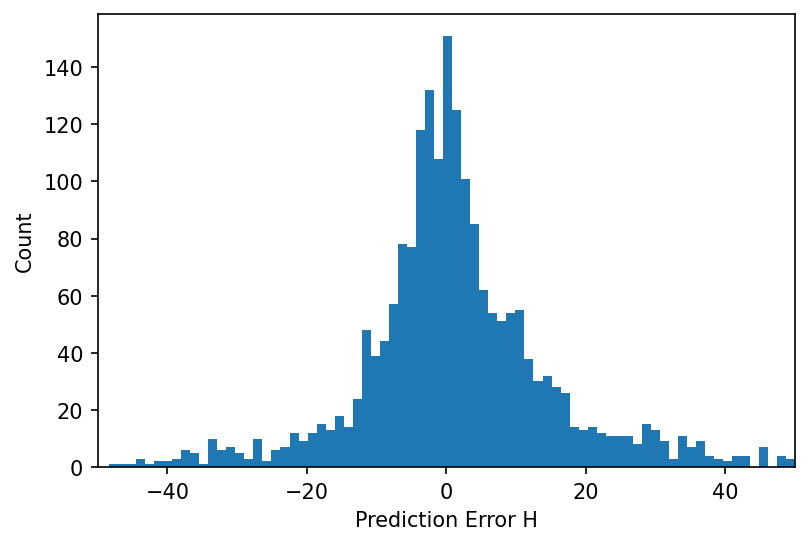

In [13]:
error = Y_predict[:,0] - Y_test[:,0]
plt.figure(dpi = 150)
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error H")
plt.ylabel("Count")
plt.xlim(-50,50)
plt.savefig('Error H.png', dpi = 150)

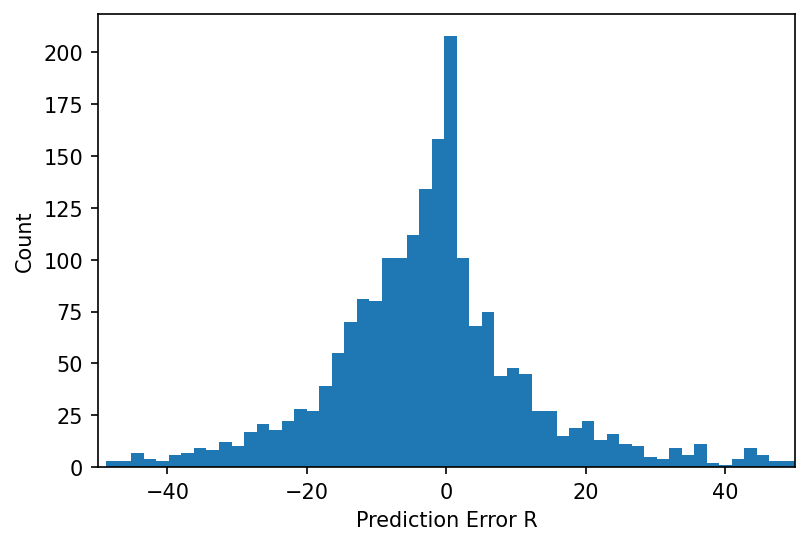

In [14]:
error = Y_predict[:,1] - Y_test[:,1]
plt.figure(dpi = 150)
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error R")
plt.ylabel("Count")
plt.xlim(-50,50)
plt.savefig('Error R.png', dpi = 150)